In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [5]:
train=pd.read_csv('datas/Train.csv')

In [6]:
test=pd.read_csv('datas/Test.csv')

In [7]:
print(train.head())
train.info()

  Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier

In [8]:
idsUnique = len(set(train.Item_Identifier))
idsTotal = data.shape[0]
idsDupli = idsTotal - idsUnique
print("There are " + str(idsDupli) + " duplicate IDs for " + str(idsTotal) + " total entries")

NameError: name 'data' is not defined

C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


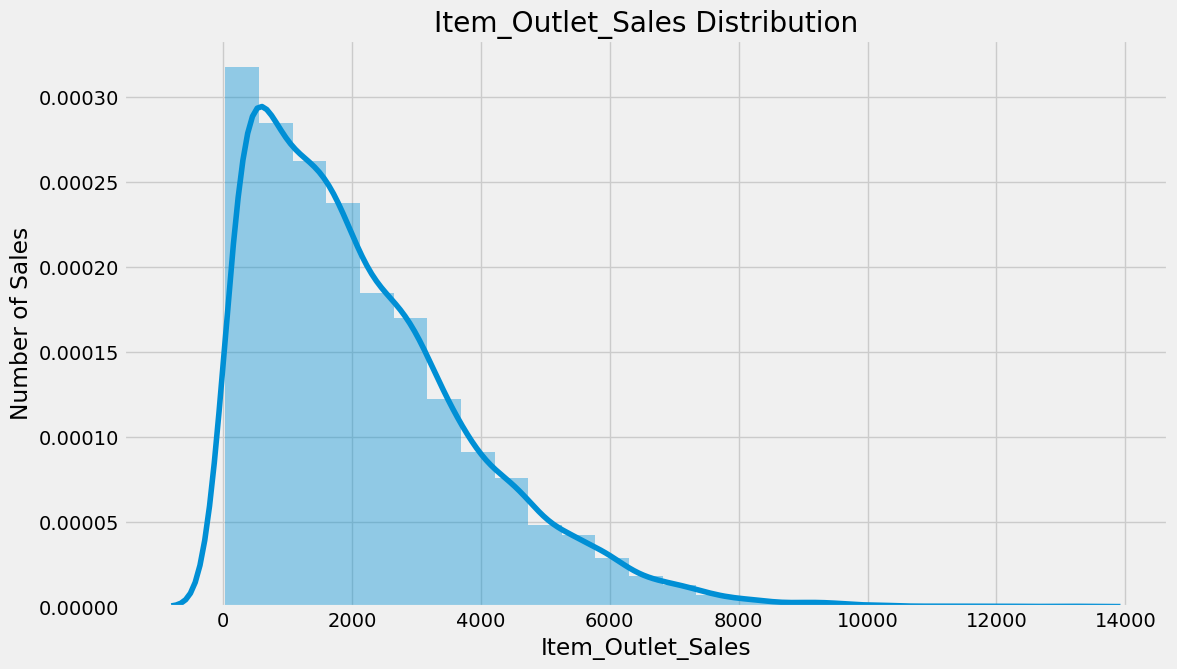

In [9]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12, 7))
sns.distplot(train.Item_Outlet_Sales, bins=25)
plt.ticklabel_format(style='plain', axis='x', scilimits=(0, 1))
plt.xlabel("Item_Outlet_Sales")
plt.ylabel("Number of Sales")
plt.title("Item_Outlet_Sales Distribution")
plt.show() 

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


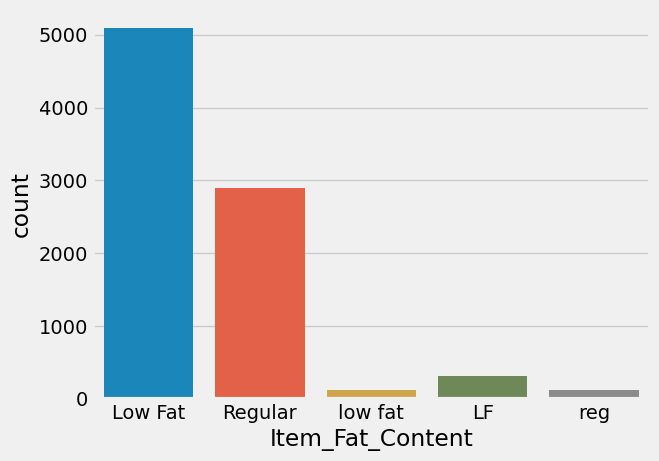

In [10]:
sns.countplot(train.Item_Fat_Content)
plt.show()

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


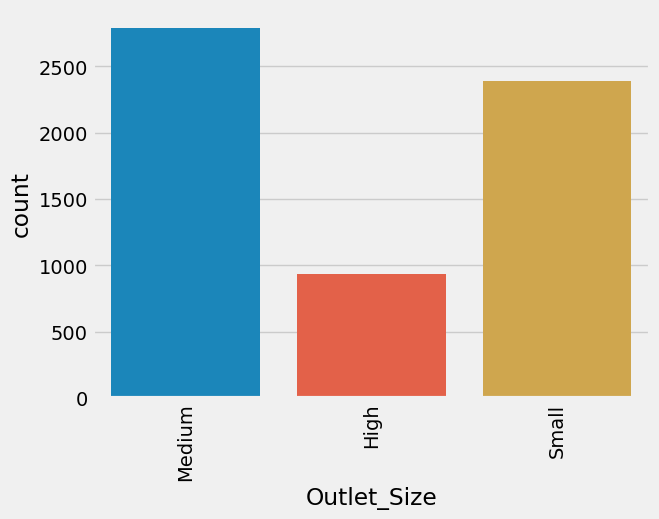

In [11]:

sns.countplot(train.Item_Type)
plt.xticks(rotation=90)
sns.countplot(train.Outlet_Size)
plt.show()

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


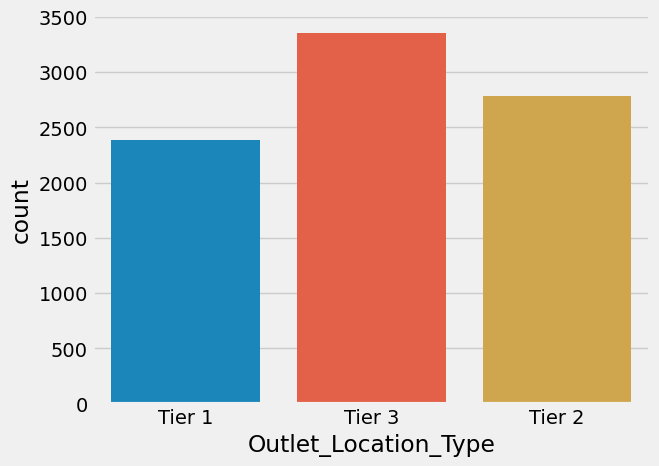

In [12]:
sns.countplot(train.Outlet_Location_Type)
plt.show()

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


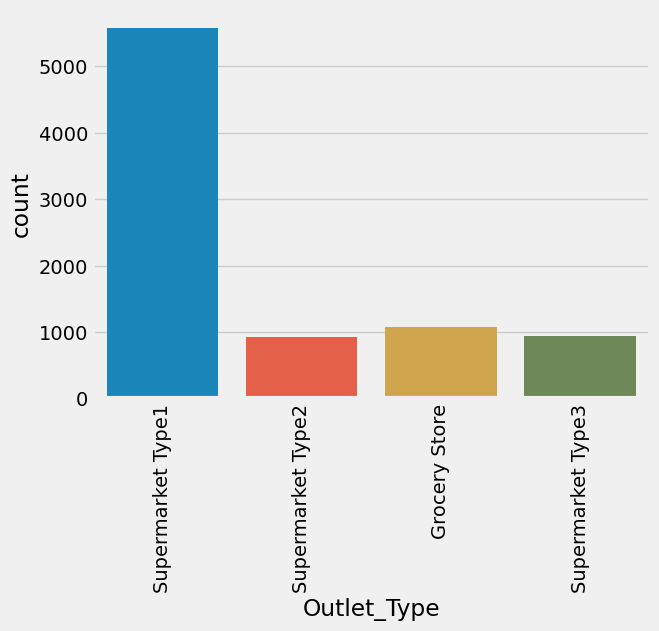

In [13]:
sns.countplot(train.Outlet_Type)
plt.xticks(rotation=90)
plt.show() 

In [14]:
train['source'] = 'train'
test['source'] = 'test'

data = pd.concat([train, test], ignore_index=True)
print(train.shape, test.shape, data.shape)

(8523, 13) (5681, 12) (14204, 13)


In [15]:
item_avg_weight = data.pivot_table(values='Item_Weight', index='Item_Identifier')

In [16]:
def impute_weight(cols):  # Filling null values with mean
    Weight = cols[0]
    Identifier = cols[1]

    if pd.isnull(Weight):
        return item_avg_weight['Item_Weight'][item_avg_weight.index == Identifier]
    else:
        return Weight


In [17]:
print ('Orignal missing: %d' % sum(data['Item_Weight'].isnull()))
print (data['Item_Weight'].mean())

data['Item_Weight'] = data[['Item_Weight', 'Item_Identifier']].apply(impute_weight, axis=1).astype(float)

print ('Final missing: %d' % sum(data['Item_Weight'].isnull()))


Orignal missing: 2439
12.792854228644991
Final missing: 0


In [18]:
from scipy.stats import mode

# Determing the mode for each
outlet_size_mode = data.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=lambda x: x.mode())


In [19]:
def impute_size_mode(cols):  # Same as above but using mode
    Size = cols[0]
    Type = cols[1]
    if pd.isnull(Size):
        return outlet_size_mode.loc['Outlet_Size'][outlet_size_mode.columns == Type][0]
    else:
        return Size

In [20]:
print ('Orignal missing: %d' % sum(data['Outlet_Size'].isnull()))
data['Outlet_Size'] = data[['Outlet_Size', 'Outlet_Type']].apply(impute_size_mode, axis=1)
print ('Final missing: %d' % sum(data['Outlet_Size'].isnull()))

Orignal missing: 4016
Final missing: 0


In [21]:
visibility_item_avg = data.pivot_table(values='Item_Visibility', index='Item_Identifier')

In [22]:
def impute_visibility_mean(cols):
    visibility = cols[0]
    item = cols[1]
    if visibility == 0:
        return visibility_item_avg['Item_Visibility'][visibility_item_avg.index == item]
    else:
        return visibility

In [23]:
print ('Original zeros: %d' % sum(data['Item_Visibility'] == 0))
data['Item_Visibility'] = data[['Item_Visibility', 'Item_Identifier']].apply(impute_visibility_mean, axis=1).astype(float)

print ('Final zeros: %d' % sum(data['Item_Visibility'] == 0))

Original zeros: 879
Final zeros: 0


In [24]:
data['Outlet_Years'] = 2013 - data['Outlet_Establishment_Year']
data['Outlet_Years'].describe()

count    14204.000000
mean        15.169319
std          8.371664
min          4.000000
25%          9.000000
50%         14.000000
75%         26.000000
max         28.000000
Name: Outlet_Years, dtype: float64

In [25]:
data['Item_Type_Combined'] = data['Item_Identifier'].apply(lambda x: x[0:2])

In [26]:
data['Item_Type_Combined'] = data['Item_Type_Combined'].map({'FD': 'Food', 'NC': 'Non-Consumable', 'DR': 'Drinks'})

data['Item_Type_Combined'].value_counts()

Food              10201
Non-Consumable     2686
Drinks             1317
Name: Item_Type_Combined, dtype: int64

In [27]:
data['Item_Fat_Content'] = data['Item_Fat_Content'].replace({'LF': 'Low Fat', 'reg': 'Regular',
                                                             'low fat': 'Low Fat'})


In [28]:
print(data['Item_Fat_Content'].value_counts())

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64


In [29]:
data.loc[data['Item_Type_Combined'] == "Non-Consumable", 'Item_Fat_Content'] = "Non-Edible"

data['Item_Fat_Content'].value_counts()

Low Fat       6499
Regular       5019
Non-Edible    2686
Name: Item_Fat_Content, dtype: int64

In [30]:
def func(x): return x['Item_Visibility'] / visibility_item_avg['Item_Visibility'][visibility_item_avg.index == x['Item_Identifier']][0]


In [31]:
data['Item_Visibility_MeanRatio'] = data.apply(func, axis=1).astype(float)
data['Item_Visibility_MeanRatio'].describe()

count    14204.000000
mean         1.061884
std          0.235907
min          0.844563
25%          0.925131
50%          0.999070
75%          1.042007
max          3.010094
Name: Item_Visibility_MeanRatio, dtype: float64

In [32]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [33]:
data['Outlet'] = le.fit_transform(data['Outlet_Identifier'])

In [34]:
var_mod = ['Item_Fat_Content', 'Outlet_Location_Type', 'Outlet_Size', 'Item_Type_Combined', 'Outlet_Type', 'Outlet']

In [35]:
for i in var_mod:
    data[i] = le.fit_transform(data[i])

In [36]:
data.drop(['Item_Type', 'Outlet_Establishment_Year'], axis=1, inplace=True)

In [37]:
train = data.loc[data['source'] == "train"]
test = data.loc[data['source'] == "test"]

In [38]:
test.drop(['Item_Outlet_Sales', 'source'], axis=1, inplace=True)
train.drop(['source'], axis=1, inplace=True)


C:\Users\USER\AppData\Local\Temp\ipykernel_2388\3488414630.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.drop(['Item_Outlet_Sales', 'source'], axis=1, inplace=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_2388\3488414630.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.drop(['source'], axis=1, inplace=True)


In [39]:
train.to_csv("datas/train_modified.csv", index=False)
test.to_csv("datas/test_modified.csv", index=False)


In [40]:
train_df = pd.read_csv('datas/train_modified.csv')
test_df = pd.read_csv('datas/test_modified.csv')


In [41]:
target = 'Item_Outlet_Sales'
IDcol = ['Item_Identifier', 'Outlet_Identifier']

In [42]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics

In [43]:
def modelfit(alg, dtrain, dtest, predictors, target, IDcol, filename):
    # Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain[target])

    # Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])

    # Remember the target had been normalized
    Sq_train = (dtrain[target])**2


    cv_score = cross_val_score(alg, dtrain[predictors], Sq_train, cv=20, scoring='neg_mean_squared_error')
    cv_score = np.sqrt(np.abs(cv_score))

    # Print model report:
    print("\nModel Report")
    print("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error(Sq_train.values, dtrain_predictions)))

    print("CV Score : Mean - %.4g | Std - %.4g | Min - %.4g | Max - %.4g" % (np.mean(cv_score), np.std(cv_score), np.min(cv_score), np.max(cv_score)))

    # Predict on testing data:
    dtest[target] = alg.predict(dtest[predictors])

    # Export submission file:
    IDcol.append(target)
    submission = pd.DataFrame({x: dtest[x] for x in IDcol})
    submission.to_csv(filename, index=False)

In [44]:
#dtrain_predictions = alg.predict(dtrain[predictors])

In [45]:
#Sq_train = (dtrain[target])**2

In [46]:
#cv_score = cross_val_score(alg, dtrain[predictors], Sq_train, cv=20, scoring='neg_mean_squared_error')
#cv_score = np.sqrt(np.abs(cv_score))

In [47]:
#print("\nModel Report")
#print("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error(Sq_train.values, dtrain_predictions)))

#print("CV Score : Mean - %.4g | Std - %.4g | Min - %.4g | Max - %.4g" % (np.mean(cv_score), np.std(cv_score), np.min(cv_score), np.max(cv_score)))


In [48]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression(normalize=True)

In [49]:
predictors = train_df.columns.drop(['Item_Outlet_Sales', 'Item_Identifier', 'Outlet_Identifier'])
modelfit(LR, train_df, test_df, predictors, target, IDcol, 'LR.csv')


Model Report
RMSE : 1.4e+07
CV Score : Mean - 9.271e+06 | Std - 1.035e+06 | Min - 7.867e+06 | Max - 1.19e+07


C:\Users\USER\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
C:\Users\USER\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = m

In [50]:
from sklearn.tree import DecisionTreeRegressor
DT = DecisionTreeRegressor(max_depth=15, min_samples_leaf=100)
modelfit(DT, train_df, test_df, predictors, target, IDcol, "DT.csv")


Model Report
RMSE : 1.4e+07
CV Score : Mean - 8.601e+06 | Std - 8.683e+05 | Min - 7.244e+06 | Max - 1.062e+07


In [51]:
RF = DecisionTreeRegressor(max_depth=8, min_samples_leaf=150)
modelfit(RF, train_df, test_df, predictors, target, IDcol, "RF.csv")


Model Report
RMSE : 1.4e+07
CV Score : Mean - 8.619e+06 | Std - 9.027e+05 | Min - 7.433e+06 | Max - 1.082e+07


In [52]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [66]:
from xgboost import XGBRegressor

In [67]:
XF = XGBRegressor()
modelfit(XF,  train_df, test_df, predictors, target, IDcol,"XF.csv")


Model Report
RMSE : 1.4e+07
CV Score : Mean - 9.42e+06 | Std - 1.146e+06 | Min - 7.761e+06 | Max - 1.225e+07
